# RNN with image classification

In [1]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

## Step 1: Load the data

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [4]:
N = 60000
T = 28
D = 28

## Step 2: Build the model

In [5]:
i = Input(shape = (T,D))
x = LSTM(128)(i)
x = Dense(10, activation = 'softmax')(x)

model = Model(i,x)
model.compile(optimizer ='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Step 3: Train

In [6]:
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3427 - accuracy: 0.8891 - val_loss: 0.1247 - val_accuracy: 0.9637
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1044 - accuracy: 0.9686 - val_loss: 0.0697 - val_accuracy: 0.9793
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0707 - accuracy: 0.9790 - val_loss: 0.0608 - val_accuracy: 0.9819
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0561 - accuracy: 0.9828 - val_loss: 0.0642 - val_accuracy: 0.9817
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0454 - accuracy: 0.9865 - val_loss: 0.0516 - val_accuracy: 0.9847
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0378 - accuracy: 0.9884 - val_loss: 0.0533 - val_accuracy: 0.9832
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0315 - accuracy: 0.9905 - val_loss: 0.0436 -

## Step 4: Evaluate

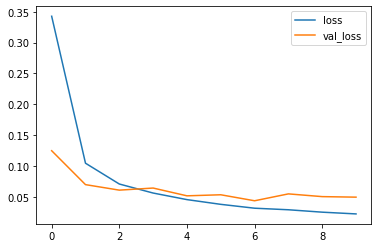

In [7]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

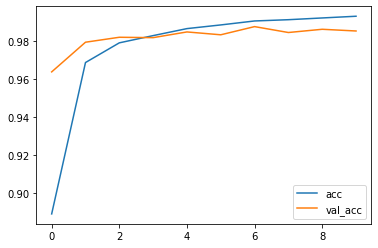

In [8]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[ 974    0    1    0    1    1    0    1    2    0]
 [   1 1128    0    2    0    0    2    1    1    0]
 [   2    0 1025    1    0    0    0    4    0    0]
 [   0    0    2 1001    0    3    0    2    2    0]
 [   0    0    0    0  972    0    0    0    1    9]
 [   1    0    0    4    0  880    1    3    2    1]
 [   7    5    2    0    8    7  929    0    0    0]
 [   0    2    9    2    1    0    0 1013    0    1]
 [   6    0    2   17    0    3    0    2  944    0]
 [   0    0    2    2    7    3    0    4    5  986]]


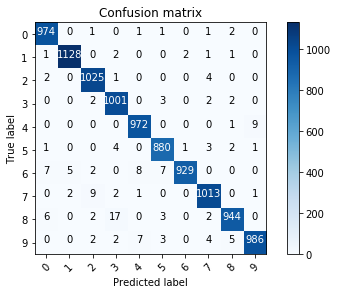

In [9]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

## Step 5: Prediction

In [10]:
p = np.argmax(model.predict(x_test), axis = 1)
l = np.where(y_test != p)
l = list(l[0])

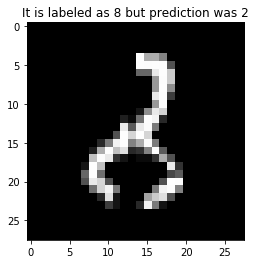

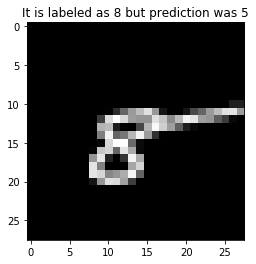

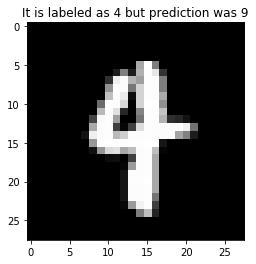

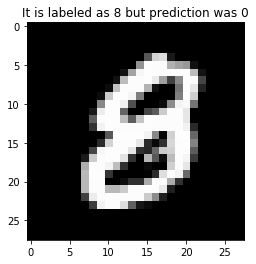

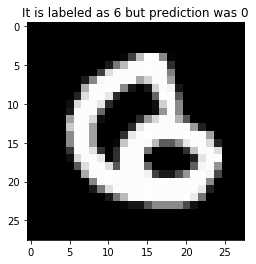

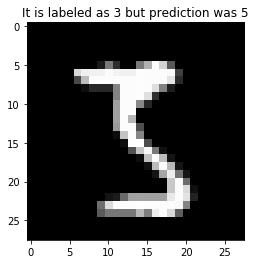

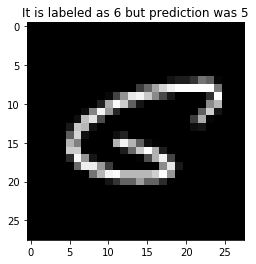

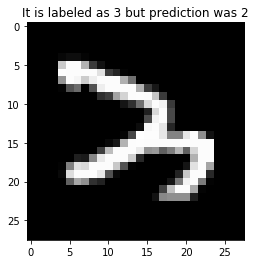

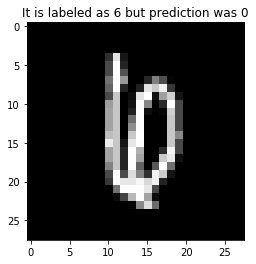

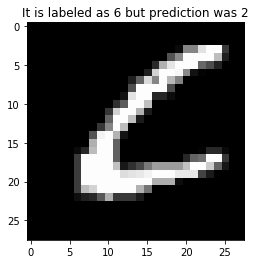

In [11]:
for i in range(10):
    random_number = np.random.choice(l)
    plt.imshow(x_test[random_number], cmap = 'gray')
    plt.title("It is labeled as %s but prediction was %s"% (y_test[random_number],p[random_number]))
    plt.show()